In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# from projekt.get_data import get_data
# from projekt.add_geo_data import add_location_add_distance_to_city_centre

In [1]:
# filtered = get_data()

# filtered: pd.DataFrame = filtered.apply(add_location_add_distance_to_city_centre, axis=1) # type: ignore

# filtered.to_csv("data.csv")

In [4]:

from src.get_data import get_data
from src.filter_data import clean_data

dataset = get_data("../data/data.csv")
filtered = clean_data(dataset)

display(filtered.head())

Unnamed: 0                                            address  \
1           1  Krawiecka, Ostrów Tumski, Stare Miasto, Wrocła...   
5           5  Ruska, Dzielnica Czterech Wyznań, Stare Miasto...   
8           8  Henryka Sienkiewicza, Plac Grunwaldzki, Wrocła...   
9           9  Kleczkowska, Kleczków, Wrocław, województwo do...   
11         11  Stanisława Drabika, Jagodno, Wrocław, wojewódz...   

   aiAvailableFrom  aiDeposit  \
1            TODAY     9000.0   
5       2024-03-01     3530.0   
8            TODAY     1900.0   
9       2024-03-01     2800.0   
11           TODAY     3500.0   

                                        aiDescription  \
1   Stylowe nowocześnie urządzone mieszkanie o wys...   
5   Na wynajem 2-pokojowe mieszkanie z balkonem pr...   
8   Mieszkanie 2 pokojowe w rejonie ul. Sienkiewic...   
9   Nowocześnie urządzone mieszkanie kawalerskie o...   
11  Mieszkanie do wynajęcia od zaraz, bardzo ciche...   

                                              aiTitle  area  \
1           Nowoczesne 3-pokojowe mieszkanie, centrum  70.0   
5   2 pokojowe mieszkanie z balkonem ul. Ruska - S...  36.0   
8    Mieszkanie 2 pokojowe w okolicy ul. Sienkiewicza  40.0   
9       Kawalerka we Wrocławiu przy ul. Kleczkowskiej  27.0   
11  Mieszkanie z dużym tarasem - Wrocław, ul. Drabika  48.0   

                  createdAt  \
1   2024-02-09 15:39:03.859   
5   2024-02-09 17:05:03.644   
8   2024-02-23 14:14:03.710   
9   2024-02-28 13:18:04.590   
11  2024-02-09 16:23:05.158   

                                          description  distanceToCityCentre  \
1   <p>Na wynajem stylowe nowocześnie urządzone, w...            206.789259   
5   Na wynajem 2-pokojowe mieszkanie z balkonem pr...           1062.335464   
8   UMOWA NAJMU OKAZJONALNEGO - WYMAGANY POLSKI AD...           2008.192440   
9   <p>Do wynajęcia ładna kawalerka we Wrocławiu o...           2112.389161   
11  Mieszkanie do wynajęcia od zaraz, bardzo ciche...           5830.659888   

             fullLocation                         id   latitude  \
1      Krawiecka, Wrocław  clsetbxv70b1pp407xfrt5994  51.108686   
5          Ruska, Wrocław  clsewej6k0b23p40722b3vmch  51.110508   
8   Sienkiewicza, Wrocław  clsyqgjwd0erfk1070o9yb18y  51.115012   
9    Kleczkowska, Wrocław  clt5tntbh0dchp407oavaw72o  51.126787   
11       Drabika, Wrocław  clseuwjwm0ct3k1077cfm9gkd  51.056706   

                 location  longitude  numberOfRooms            offerDate  \
1   Wrocław, Stare Miasto  17.037611            3.0  2023-10-20 13:40:37   
5   Wrocław, Stare Miasto  17.025727            2.0  2024-02-09 16:59:49   
8    Wrocław, Śródmieście  17.067253            2.0  2024-02-23 14:05:01   
9                 Wrocław  17.032714            1.0  2024-02-28 13:12:38   
11        Wrocław, Krzyki  17.053780            2.0  2023-02-26 19:36:59   

     price                                              title  \
1   4500.0            3-pok, wysoki standard, klima, centrum!   
5   2799.0         2 pokoje + balkon ul. Ruska - Stare Miasto   
8   1900.0  2 pokoje, ok. ul. Sienkiewicza, ok 2730 zł WSZ...   
9   2200.0                             Kawalerka do wynajęcia   
11  2800.0  Mieszkanie z dużym tarasem - Wrocław,  ul.  Dr...   

                                                  url  
1   https://www.olx.pl/d/oferta/3-pok-wysoki-stand...  
5   https://www.olx.pl/d/oferta/2-pokoje-balkon-ul...  
8   https://www.olx.pl/d/oferta/2-pokoje-ok-ul-sie...  
9   https://www.olx.pl/d/oferta/kawalerka-do-wynaj...  
11  https://www.olx.pl/d/oferta/mieszkanie-z-duzym...

In [21]:
from ydata_profiling import ProfileReport

profile = ProfileReport(filtered, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

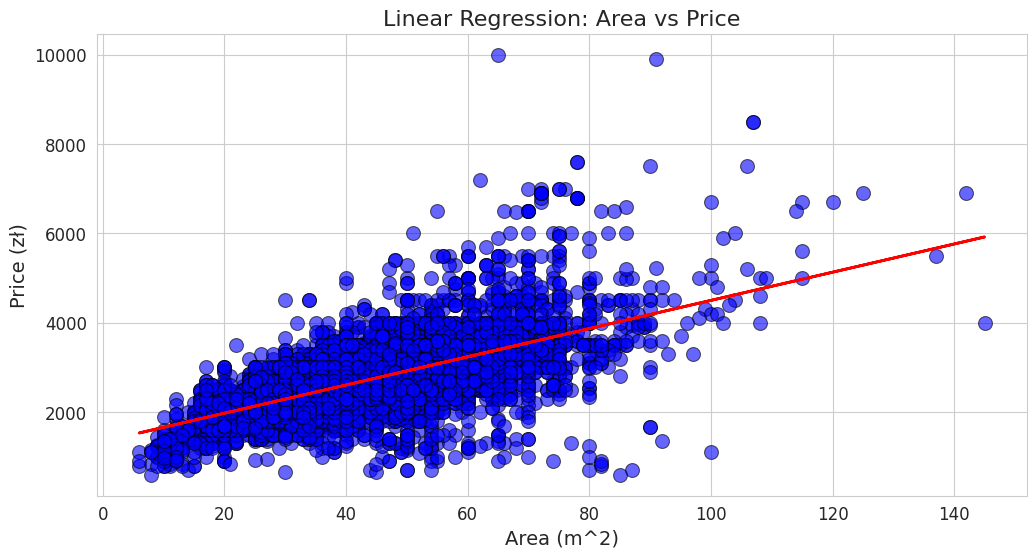

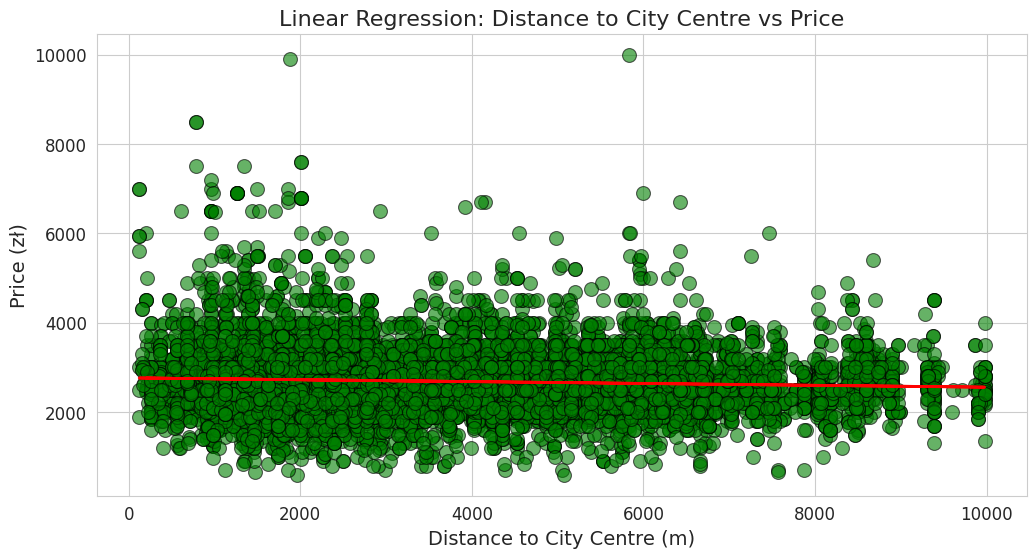

In [5]:
from sklearn.linear_model import LinearRegression

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Linear regression for 'area' vs 'price'
regression_area = LinearRegression().fit(filtered[['area']], filtered['price'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', data=filtered, color='blue', s=100, edgecolor='black', alpha=0.6)
plt.plot(filtered['area'], regression_area.predict(filtered[['area']]), color='red', linewidth=2)
plt.title('Linear Regression: Area vs Price', fontsize=16)
plt.xlabel('Area (m^2)', fontsize=14)
plt.ylabel('Price (zł)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Linear regression for 'distanceToCityCentre' vs 'price'
regression_distance = LinearRegression().fit(filtered[['distanceToCityCentre']], filtered['price'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='distanceToCityCentre', y='price', data=filtered, color='green', s=100, edgecolor='black', alpha=0.6)
plt.plot(filtered['distanceToCityCentre'], regression_distance.predict(filtered[['distanceToCityCentre']]), color='red', linewidth=2)
plt.title('Linear Regression: Distance to City Centre vs Price', fontsize=16)
plt.xlabel('Distance to City Centre (m)', fontsize=14)
plt.ylabel('Price (zł)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
meters = 62
print(f"Price = {regression_area.intercept_} + {regression_area.coef_[0]} * Area")
price = regression_area.predict([[meters]])[0]



Price = 1349.317640356113 + 31.46995209400817 * Area


/home/rei/projects/studia/MSiD/projekt/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


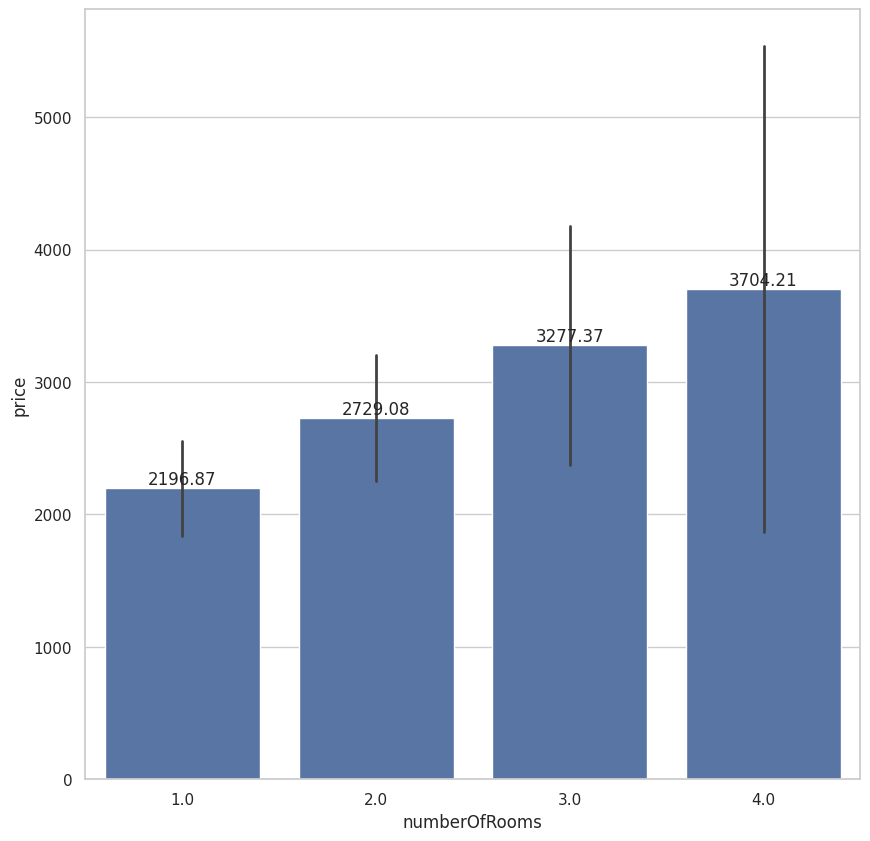

In [9]:


plt.figure(figsize=(10, 10))

sns.set_theme(style="whitegrid")

ax = sns.barplot(x='numberOfRooms', y='price', data=filtered, errorbar="sd", err_kws={"linewidth": 2})
ax.bar_label(ax.containers[0])


price_per_room = filtered.copy()
price_per_room['pricePerRoom'] = price_per_room['price'] / price_per_room['numberOfRooms']

# plt.subplot(1, 2, 2)

# ax = sns.barplot(x='numberOfRooms', y='pricePerRoom', data=price_per_room, errorbar="sd", err_kws={"linewidth": 2})
# ax.bar_label(ax.containers[0])
# ax.legend(title='Rooms', loc='upper left', labels=['Price per room'])


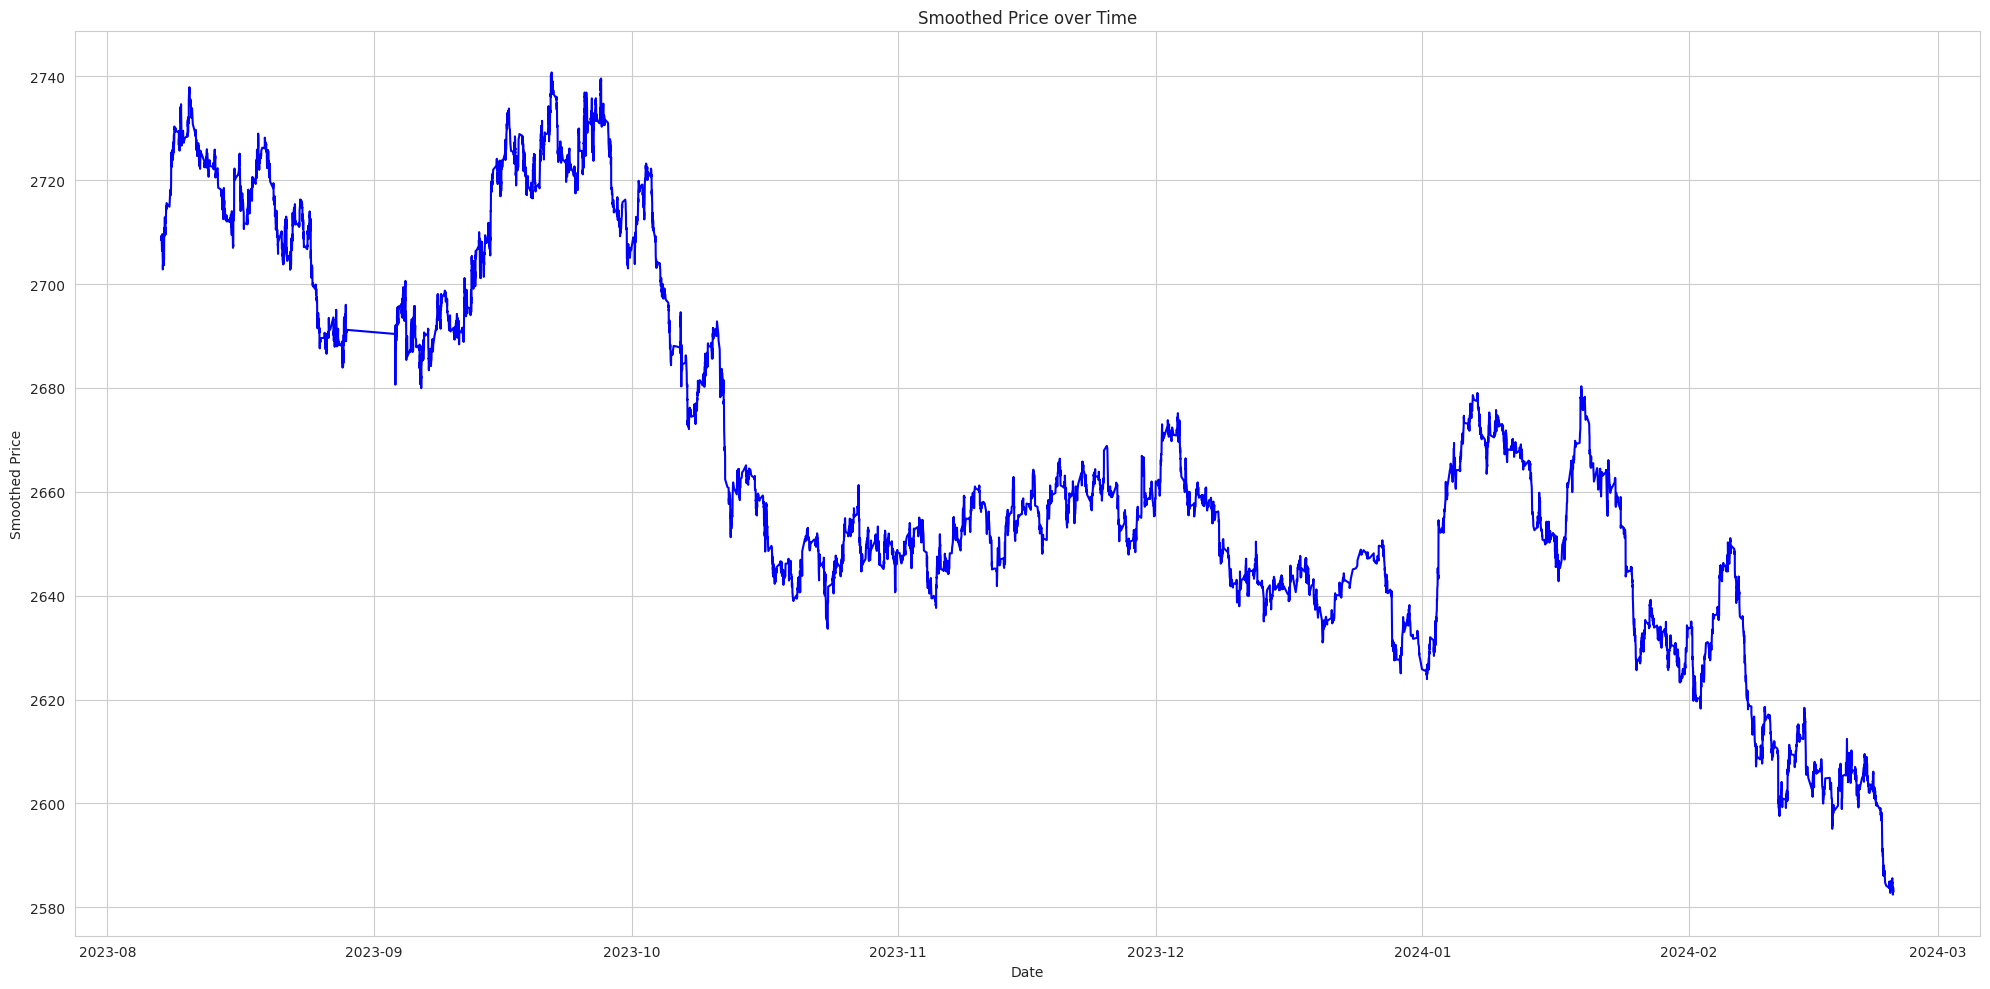

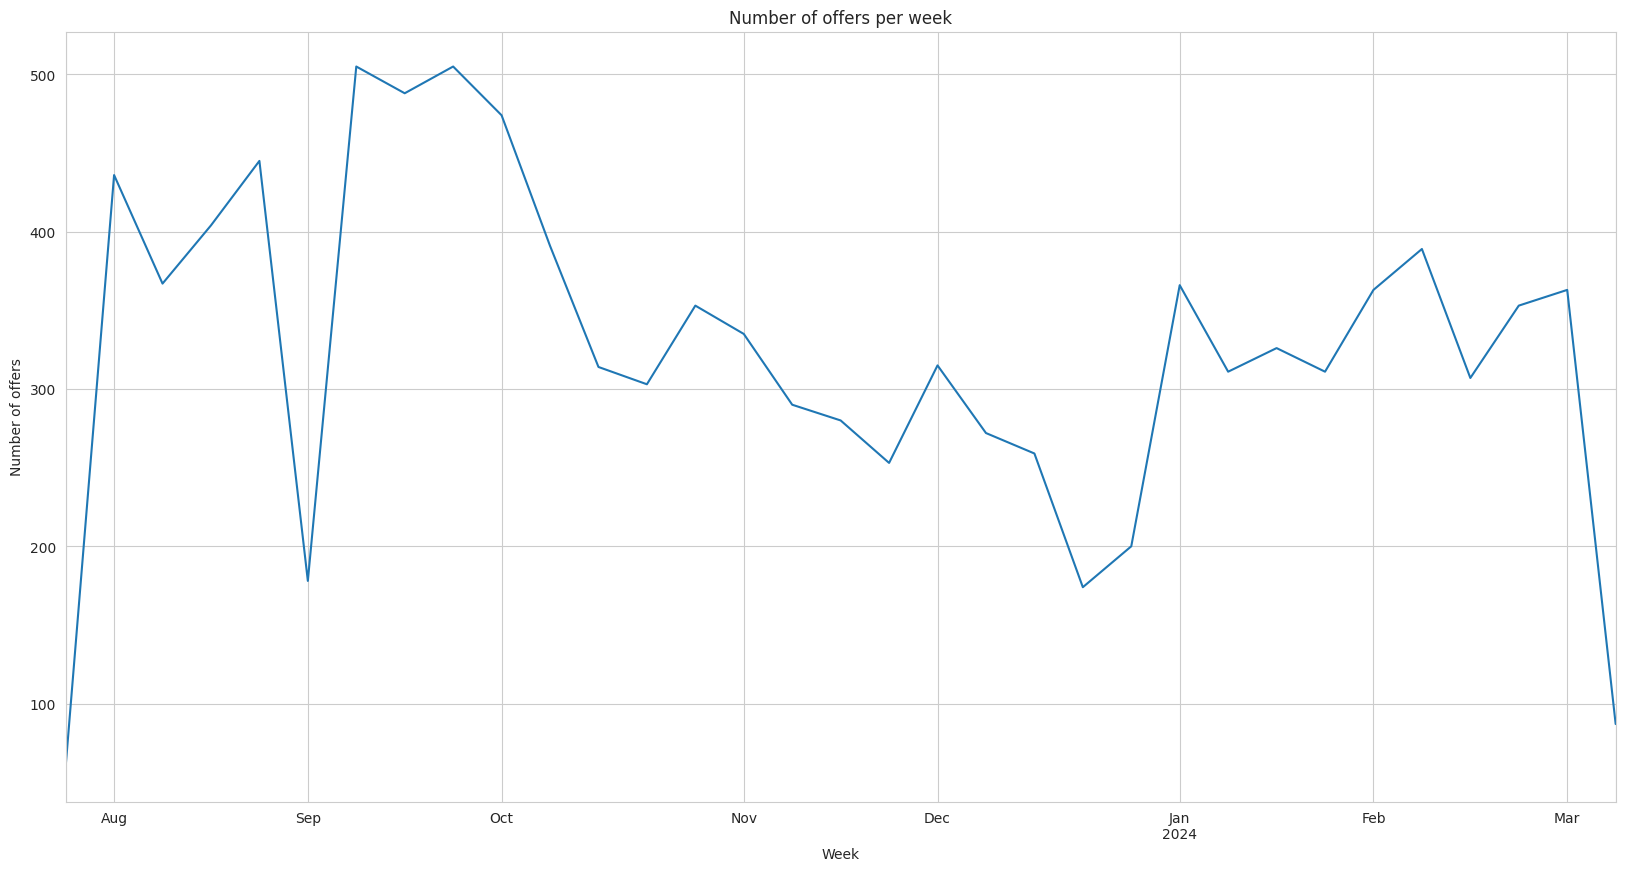

In [31]:
filtered['createdAt'] = pd.to_datetime(filtered['createdAt'])

# Sort data just in case it's not sorted
filtered.sort_values('createdAt', inplace=True)

# Calculate rolling mean
rolling_window = 1000  # Adjust this window size based on your data
filtered['smoothed_price'] = filtered['price'].rolling(window=rolling_window, center=True).mean()

# Create plot
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='createdAt', y='smoothed_price', data=filtered, color='blue')

# Set titles and labels
ax.set_title('Smoothed Price over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Smoothed Price')

# Optionally, set limits and grid
plt.grid(True)  # Turn on grid by default
plt.tight_layout()  # Adjust subplots to give some padding

plt.show()

# plot number of offers per week
plt.figure(figsize=(20, 10))
filtered.resample('W', on='createdAt').size().plot()
plt.title('Number of offers per week')
plt.ylabel('Number of offers')
plt.xlabel('Week')
plt.show()

Text(0, 0.5, 'Frequency')

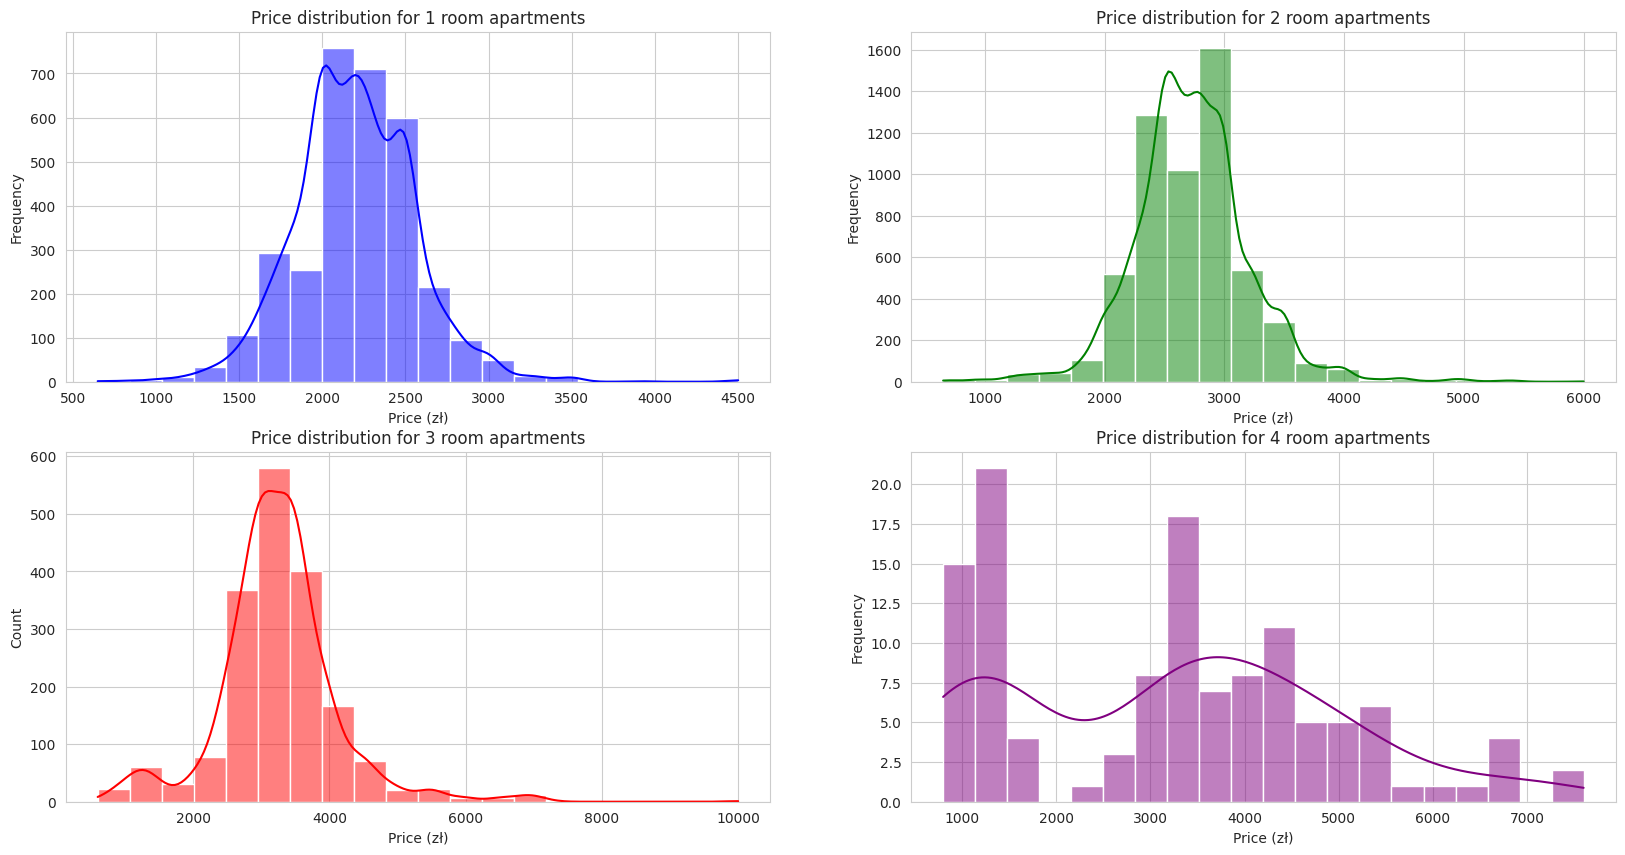

In [38]:
# plot the histogram of prices per 1 room, 2 rooms, 3 rooms and 4 rooms apartments

plt.figure(figsize=(20, 10))


number_of_bins = 20
plt.subplot(2, 2, 1)
sns.histplot(filtered[filtered['numberOfRooms'] == 1]['price'], bins=number_of_bins, color='blue', kde=True)
plt.title('Price distribution for 1 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(filtered[filtered['numberOfRooms'] == 2]['price'], bins=number_of_bins, color='green', kde=True)
plt.title('Price distribution for 2 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(filtered[filtered['numberOfRooms'] == 3]['price'], bins=number_of_bins,  color='red', kde=True)
plt.title('Price distribution for 3 room apartments')
plt.xlabel('Price (zł)')

plt.subplot(2, 2, 4)
sns.histplot(filtered[filtered['numberOfRooms'] == 4]['price'], bins=number_of_bins,  color='purple', kde=True)
plt.title('Price distribution for 4 room apartments')
plt.xlabel('Price (zł)')
plt.ylabel('Frequency')


In [7]:
from projekt.model import is_occasional_rental

occasions = filtered.apply(lambda x: is_occasional_rental(x["price"], x["area"]), axis=1)

# print the number of occasional rentals

number_of_occasional_rentals = occasions.sum()

print(f"Number of occasional rentals: {number_of_occasional_rentals}")

print(f"Percentage of occasional rentals: {number_of_occasional_rentals / len(occasions) * 100:.2f}%")

print(f"Random apartment that is an occasional rental: {filtered[occasions].sample(1)}")



Number of occasional rentals: 1174
Percentage of occasional rentals: 10.73%
Random apartment that is an occasional rental:                                                  address aiAvailableFrom  \
17157  Antoniego Wiwulskiego, Wittigowo, Dąbie, Bisku...           TODAY   

       aiDeposit                                      aiDescription  \
17157     4000.0  Apartament w najbliższej okolicy Hali Stulecia...   

                                                 aiTitle  area  \
17157  Do wynajęcia Trzypokojowe mieszkanie - ul. Wiw...  60.0   

                     createdAt  \
17157  2024-01-04 13:45:07.526   

                                             description  \
17157  Do wynajęcia apartament w najbliższej okolicy ...   

       distanceToCityCentre          fullLocation                         id  \
17157            3191.10373  Wiwulskiego, Wrocław  clqz9eqx207x9k107s1k5jnn8   

        latitude            location  longitude  numberOfRooms  \
17157  51.101962  Wrocław, Psie

group
0      810.000000
1     1126.111111
2     1537.336538
3     1789.080321
4     1857.384127
5     2035.417553
6     2148.438710
7     2155.435673
8     2265.978022
9     2369.195312
10    2413.000000
11    2592.870968
12    2129.411765
13    2637.500000
14    1892.500000
15    2200.000000
16    4000.000000
17    3990.000000
18    5000.000000
19    6700.000000
20    5500.000000
21    4000.000000
dtype: float64


/tmp/ipykernel_516175/429484104.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_prices = df.groupby('group').apply(average_of_cheapest_10_percent)


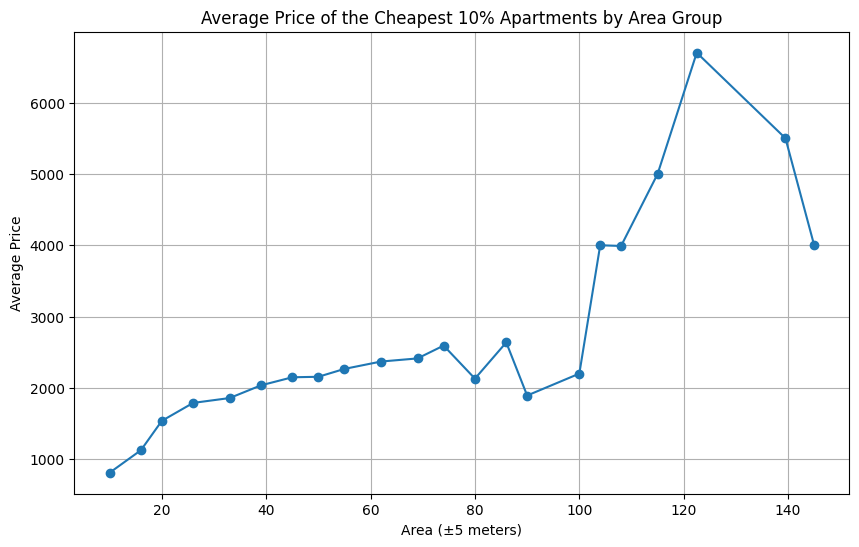

In [19]:
# Sort the dataframe by area for grouping
df = filtered.sort_values(by='area')

# Function to assign group based on ±5 meters range
def assign_group(x):
    base = df['area'].iloc[0]
    groups = []
    group_number = 0
    for area in x:
        if area > base + 5:
            group_number += 1
            base = area
        groups.append(group_number)
    return groups

df['group'] = assign_group(df['area'])

# Function to get the average price of the 10% cheapest apartments in each group
def average_of_cheapest_10_percent(group):
    n = max(1, int(len(group) * 0.2))  # Ensure at least one apartment is considered
    cheapest = group.nsmallest(n, 'price')
    return cheapest['price'].mean()

average_prices = df.groupby('group').apply(average_of_cheapest_10_percent)

print(average_prices)

# Extract a representative area value for each group (e.g., median area in each group)
df['median_area_in_group'] = df.groupby('group')['area'].transform('median')

# Merge the median areas back with the average prices for plotting
plot_data = average_prices.to_frame().join(df.drop_duplicates('group').set_index('group')['median_area_in_group'])

# Sort values for better visualization
plot_data.sort_values(by='median_area_in_group', inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(plot_data['median_area_in_group'], plot_data[0], marker='o', linestyle='-')
plt.title('Average Price of the Cheapest 10% Apartments by Area Group')
plt.xlabel('Area (±5 meters)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()